In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 7.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=4a197c434433aa53f659c79967b430cd769a6e2f1f408d59956921e9dc836890
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

##Bagging

같은 분류기(머신러닝 모델) 을 각각 다른 데이터 로 분석 하는 방식이다 
분류기가 predict_proba 조건부 확률을 보여주는 함구 
class label 에서 높은 클래스 예측 결과가 됨

In [4]:
#기본 데이터 load 및 데이터 분류
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer #유방암 데이터 

cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,random_state = 0)

In [8]:
#model 생성 및 평가 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

#bagging class 에 적용하는 분류기의 특성(매개변수) 만 사용할수 있다.
model = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10,max_samples=5,bootstrap=True,oob_score=True)
model.fit(train_x,train_y)

#model_score
print(model.score(train_x,train_y))
print(model.score(test_x,test_y))
print(model.oob_score_)

0.8661971830985915
0.8601398601398601
0.8661971830985915


###Bagging 실습 1 
결정 트리로 배깅 을 수행 

In [10]:
#import and data load and split
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

x,y = make_moons(n_samples=100,noise=0.25,random_state=0)

train_x,test_x,train_y,test_y = train_test_split(x,y, stratify=y, random_state = 42)

In [13]:
#bagginhclassifier 실습 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,random_state=0,oob_score=True)
model.fit(train_x,train_y)

print(model.score(train_x,train_y))
print(model.score(test_x,test_y))
print(model.oob_score_)

0.9866666666666667
0.88
0.84


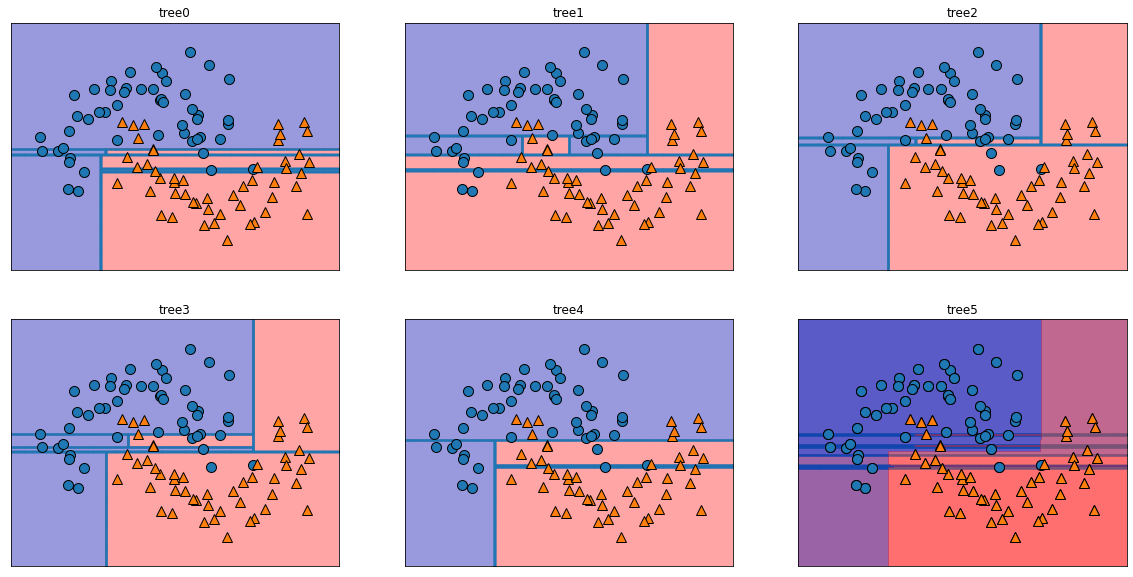

In [17]:
#결정 경계 시각화 
fig, axes = plt.subplots(2, 3, figsize=(20, 10) )
for i ,(tree,ax) in enumerate(zip(model.estimators_,axes.ravel())):
  mglearn.plots.plot_tree_partition(x,y,tree,ax=ax)
  ax.set_title(f'tree{i}')

mglearn.plots.plot_2d_separator(model,x,ax=axes[-1,-1],fill=True,alpha=0.4)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

In [20]:
#n_estimators
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth =4),n_estimators=100,n_jobs =2,random_state=42,oob_score = True)

model.fit(train_x,train_y)
print(model.score(train_x,train_y))
print(model.score(test_x,test_y))
print(model.oob_score_)

1.0
0.88
0.8933333333333333


##Extra Tree


In [22]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(random_state=0,max_depth=5,bootstrap=True,oob_score=True,n_estimators=5,n_jobs = 2)
model.fit(train_x,train_y)

print(model.score(train_x,train_y),model.score(test_x,test_y),model.oob_score_)

0.9333333333333333 0.84 0.7733333333333333


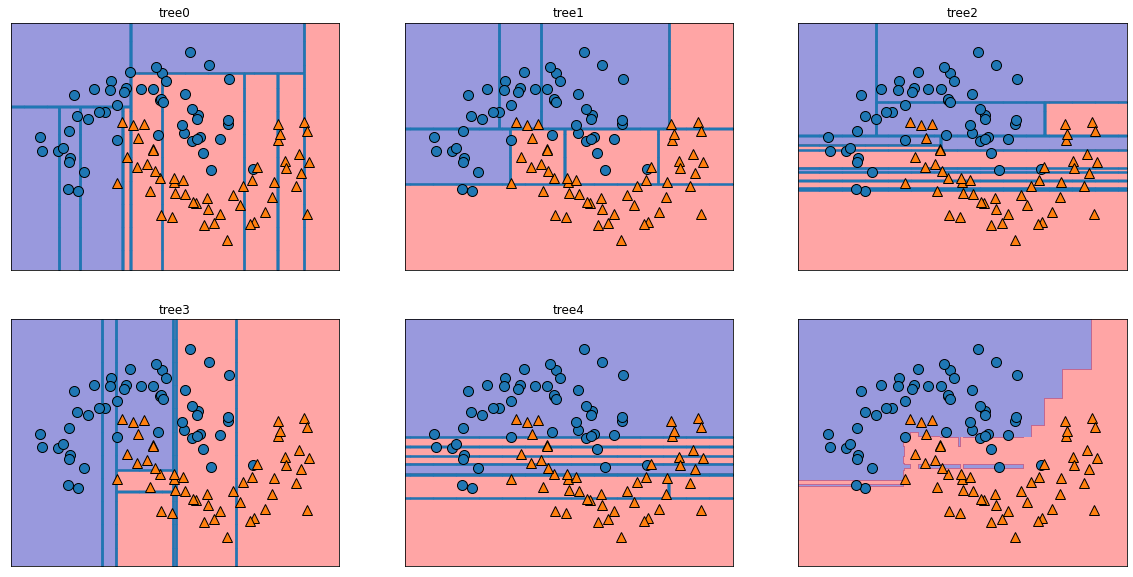

In [23]:
#결정 경계 시각화 
fig, axes = plt.subplots(2, 3, figsize=(20, 10) )
for i ,(tree,ax) in enumerate(zip(model.estimators_,axes.ravel())):
  mglearn.plots.plot_tree_partition(x,y,tree,ax=ax)
  ax.set_title(f'tree{i}')

mglearn.plots.plot_2d_separator(model,x,ax=axes[-1,-1],fill=True,alpha=0.4)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

##Extra 실습 1
유방암 데이터 로 실습 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,random_state = 0)

In [27]:
model = ExtraTreesClassifier(n_estimators=100,random_state=0,max_depth=4,bootstrap=True,oob_score=True)
model.fit(train_x,train_y)

print(model.score(train_x,train_y),model.score(test_x,test_y),model.oob_score_)

0.9577464788732394 0.951048951048951 0.9460093896713615


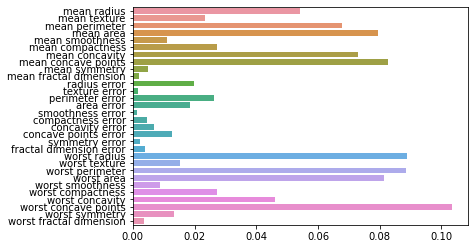

In [29]:
import seaborn as sns

sns.barplot(model.feature_importances_,y=cancer.feature_names)